In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import scipy.io   
import h5py

%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys
import tarfile
from IPython.display import display, Image

from scipy import ndimage

import random

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout

from sklearn import metrics

TensorFlow 2.x selected.


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import h5py

h5f = h5py.File('/content/drive/My Drive/DLCP/Project 1/SVHN_single_grey1.h5','r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_test'][:]
y_val = h5f['y_test'][:]

h5f.close()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_val = X_val.reshape(X_val.shape[0], 1024)

X_train = X_train/255.0
X_val = X_val/255.0

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_val.shape, y_val.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)



**Exploratory Data Analysis**

In [5]:
np.mean(X_train)

0.44026133

In [6]:
np.mean(y_train)

4.4985952380952385

In [7]:
np.mean(X_val)

0.44174716

In [8]:

np.mean(y_val)

4.503277777777778

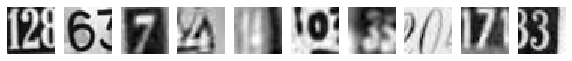

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
# visualizing the first 10 images in the dataset and their labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [10]:

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(42000, 1024) (18000, 1024) (42000,) (18000,)


In [11]:
X_train[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [12]:
y_train[0]

2

In [0]:

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

**Neural Network**

In [15]:
#Model 1: Naive MLP model without any alterations


model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 67us/sample - loss: 2.3049 - accuracy: 0.1113
Epoch 2/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2914 - accuracy: 0.1273
Epoch 3/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2780 - accuracy: 0.1563
Epoch 4/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2632 - accuracy: 0.1819
Epoch 5/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.2463 - accuracy: 0.2084
Epoch 6/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2275 - accuracy: 0.2342
Epoch 7/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.2063 - accuracy: 0.2595
Epoch 8/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.1826 - accuracy: 0.2904
Epoch 9/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.1559 - accuracy: 0.3142
Epoch

In [17]:
results = model.evaluate(X_val, y_val)

18000/18000 [==============================] - 2s 91us/sample - loss: 0.9848 - accuracy: 0.7159


In [18]:
print('Test accuracy: ', round(results[1]*100,2), '%')

Test accuracy:  71.59 %


In [19]:
#Model 2: NN with more hidden layers and ReLu

model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 25us/sample - loss: 2.3052 - accuracy: 0.1154
Epoch 2/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2950 - accuracy: 0.1300
Epoch 3/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.2873 - accuracy: 0.1494
Epoch 4/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2773 - accuracy: 0.1696
Epoch 5/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2630 - accuracy: 0.1862
Epoch 6/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2439 - accuracy: 0.1967
Epoch 7/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2190 - accuracy: 0.2190
Epoch 8/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.1864 - accuracy: 0.2374
Epoch 9/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.1446 - accuracy: 0.2688
Epoch

In [20]:
results = model.evaluate(X_val, y_val)

print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 2s 98us/sample - loss: 0.9303 - accuracy: 0.7218
Test accuracy:  72.18 %


In [21]:
#Model 3: Changing Number of activators


model = Sequential()
model.add(Dense(70, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.3048 - accuracy: 0.1055
Epoch 2/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.2975 - accuracy: 0.1177
Epoch 3/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.2921 - accuracy: 0.1303
Epoch 4/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2864 - accuracy: 0.1413
Epoch 5/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2796 - accuracy: 0.1536
Epoch 6/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2707 - accuracy: 0.1682
Epoch 7/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.2579 - accuracy: 0.1898
Epoch 8/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2419 - accuracy: 0.2081
Epoch 9/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.2222 - accuracy: 0.2300
Epoch

In [22]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 2s 92us/sample - loss: 0.8464 - accuracy: 0.7490
Test accuracy:  74.9 %


In [23]:
#Model 4: With Weight Initializers

model = Sequential()
model.add(Dense(70, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(50, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 25us/sample - loss: 2.3111 - accuracy: 0.1282
Epoch 2/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.2596 - accuracy: 0.1721
Epoch 3/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.2121 - accuracy: 0.2202
Epoch 4/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.1486 - accuracy: 0.2671
Epoch 5/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.0676 - accuracy: 0.3062
Epoch 6/100
42000/42000 [==============================] - 1s 19us/sample - loss: 1.9758 - accuracy: 0.3421
Epoch 7/100
42000/42000 [==============================] - 1s 19us/sample - loss: 1.8862 - accuracy: 0.3723
Epoch 8/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.8059 - accuracy: 0.3991
Epoch 9/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.7360 - accuracy: 0.4237
Epoch

In [24]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 2s 97us/sample - loss: 0.7555 - accuracy: 0.7776
Test accuracy:  77.76 %


In [25]:
#Model 5: Adding Batch Normalization

model = Sequential()
model.add(Dense(70, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(50, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 44us/sample - loss: 2.3167 - accuracy: 0.1773
Epoch 2/100
42000/42000 [==============================] - 1s 25us/sample - loss: 1.9583 - accuracy: 0.3322
Epoch 3/100
42000/42000 [==============================] - 1s 26us/sample - loss: 1.7414 - accuracy: 0.4403
Epoch 4/100
42000/42000 [==============================] - 1s 24us/sample - loss: 1.5775 - accuracy: 0.5085
Epoch 5/100
42000/42000 [==============================] - 1s 25us/sample - loss: 1.4459 - accuracy: 0.5621
Epoch 6/100
42000/42000 [==============================] - 1s 22us/sample - loss: 1.3342 - accuracy: 0.6020
Epoch 7/100
42000/42000 [==============================] - 1s 26us/sample - loss: 1.2400 - accuracy: 0.6344
Epoch 8/100
42000/42000 [==============================] - 1s 26us/sample - loss: 1.1602 - accuracy: 0.6576
Epoch 9/100
42000/42000 [==============================] - 1s 24us/sample - loss: 1.0974 - accuracy: 0.6714
Epoch

In [26]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 2s 113us/sample - loss: 0.8403 - accuracy: 0.7667
Test accuracy:  76.67 %


In [0]:
#Model 6: Adding Dropouts

def mlp_model():
        model = Sequential()
        model.add(Dense(70, input_shape = (1024, ), kernel_initializer='he_normal'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(50, kernel_initializer='he_normal',bias_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(30, kernel_initializer='he_normal',bias_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(10, kernel_initializer='he_normal',bias_initializer='he_uniform'))
        model.add(Activation('softmax'))

        sgd = optimizers.SGD(lr = 0.01)
        model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
        return model

In [29]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 45us/sample - loss: 2.6201 - accuracy: 0.1210
Epoch 2/100
42000/42000 [==============================] - 1s 24us/sample - loss: 2.3296 - accuracy: 0.1615
Epoch 3/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2018 - accuracy: 0.2024
Epoch 4/100
42000/42000 [==============================] - 1s 27us/sample - loss: 2.1004 - accuracy: 0.2479
Epoch 5/100
42000/42000 [==============================] - 1s 24us/sample - loss: 2.0204 - accuracy: 0.2825
Epoch 6/100
42000/42000 [==============================] - 1s 24us/sample - loss: 1.9525 - accuracy: 0.3142
Epoch 7/100
42000/42000 [==============================] - 1s 24us/sample - loss: 1.8840 - accuracy: 0.3404
Epoch 8/100
42000/42000 [==============================] - 1s 28us/sample - loss: 1.8301 - accuracy: 0.3609
Epoch 9/100
42000/42000 [==============================] - 1s 26us/sample - loss: 1.7828 - accuracy: 0.3869
Epoch

In [30]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 2s 116us/sample - loss: 0.7349 - accuracy: 0.7808
Test accuracy:  78.08 %


In [31]:
#Model 7: Changing batch size and epochs

model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 50, epochs = 200, verbose = 1)

Train on 42000 samples
Epoch 1/200
42000/42000 [==============================] - 5s 116us/sample - loss: 2.3650 - accuracy: 0.1585
Epoch 2/200
42000/42000 [==============================] - 4s 92us/sample - loss: 2.0431 - accuracy: 0.2678
Epoch 3/200
42000/42000 [==============================] - 4s 94us/sample - loss: 1.8506 - accuracy: 0.3515
Epoch 4/200
42000/42000 [==============================] - 4s 103us/sample - loss: 1.7189 - accuracy: 0.4087
Epoch 5/200
42000/42000 [==============================] - 4s 99us/sample - loss: 1.6150 - accuracy: 0.4489
Epoch 6/200
42000/42000 [==============================] - 4s 95us/sample - loss: 1.5480 - accuracy: 0.4801
Epoch 7/200
42000/42000 [==============================] - 4s 90us/sample - loss: 1.4907 - accuracy: 0.4986
Epoch 8/200
42000/42000 [==============================] - 4s 93us/sample - loss: 1.4451 - accuracy: 0.5195
Epoch 9/200
42000/42000 [==============================] - 4s 89us/sample - loss: 1.4008 - accuracy: 0.5379
Epo

In [32]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 2s 111us/sample - loss: 0.6441 - accuracy: 0.8034
Test accuracy:  80.34 %


**Preditcing values for test data set**

In [0]:
y_predict = model.predict(X_val)

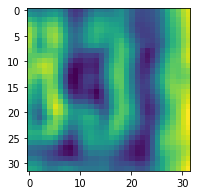

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [34]:
X_test_plt = X_val.reshape(X_val.shape[0], 32,32)
plt.figure(figsize=(3, 3))
plt.imshow(X_test_plt[365])    
plt.show()
print('Label: ', y_val[365])